<a href="https://colab.research.google.com/github/mredelis/CAP4453-Robot-Vision-Spr23/blob/main/RV_HW5_ImageWarping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Every point on this homework must be solved with python code. You will show your code, your results, and make a clear statement of what is you answer. Answer **all** the questions.
1. You will be applying a transformation on a set of points of the following image (18%).
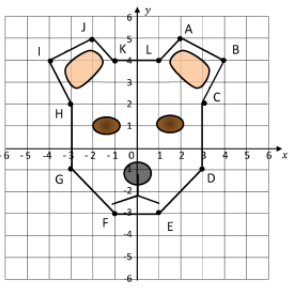
<br>
a) [2%] Find the matrix that represents a rotation of 20 degrees in homogeneous coordinates.<br>
b) [2%] Find the matrix  that represents a translation of 2 in X direction, 1 in y direction degrees in homogeneous coordinates.<br>
c) [2%] Plot the points that form the figure in the cartesian plane.<br>
d) [2%] Perform a rotation of 20 degrees on the points and plot them. <br>
e) [2%] Perform a translation  in x of 2 and a translation in y of 1 over the points previously rotated. Plot the new obtained points.<br>
f) [2%] Find a transform that represents the operation of rotation of 20 degrees followed by a translation. Compare with the points on e) and verify with a plot the match.<br>
g) [2%] Defines a matrix that represents a translation of 2 in x and a translation of 1 in y, followed by a rotation of 20 degrees. Do the transformation over the initial set of points and compare them.<br> 
h) [2%] Are the matrices obtained in g) and f) the same? Why? Justify your answer.<br>
i) [2%] Compute the inverse matrix of the transformation obtained in g). Apply such transformation over the set of points obtained in g). Do the new points match the original points? show plots to verify it.<br>



a) R Matrix that represents a rotation of 20 degrees:
 [[ 0.93969262 -0.34202014  0.        ]
 [ 0.34202014  0.93969262  0.        ]
 [ 0.          0.          1.        ]] 

b) T Matrix that represents a translation of 2 in X direction, 1 in y direction:
 [[1 0 2]
 [0 1 1]
 [0 0 1]] 

c) Original points in cartesian plane and d) Rotation of 20 degrees on the points


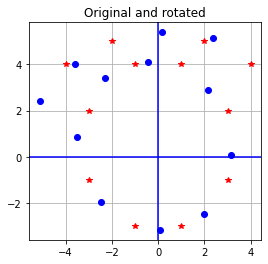

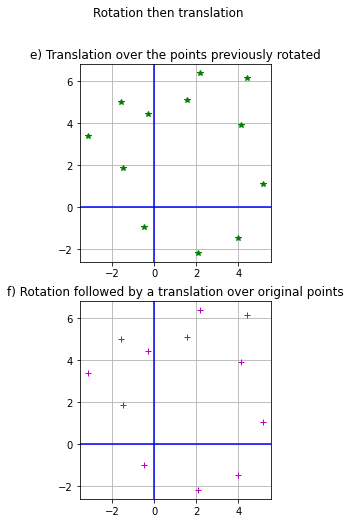

Points obtained in e): 
 [[ 2.16928452  4.39068991  4.13503758  5.16109801  3.96575305  2.08636781 -0.47705772 -1.50311815 -3.12685106 -1.58948596 -0.30777319  1.57161205]
 [ 6.38250339  6.12685106  3.90544567  1.08636781 -1.47705772 -2.16109801 -0.96575305  1.85332481  3.39068991  5.01442282  4.41675034  5.10079063]
 [ 1.          1.          1.          1.          1.          1.          1.          1.          1.          1.          1.          1.        ]] 

Points obtained in f): 
 [[ 2.16928452  4.39068991  4.13503758  5.16109801  3.96575305  2.08636781 -0.47705772 -1.50311815 -3.12685106 -1.58948596 -0.30777319  1.57161205]
 [ 6.38250339  6.12685106  3.90544567  1.08636781 -1.47705772 -2.16109801 -0.96575305  1.85332481  3.39068991  5.01442282  4.41675034  5.10079063]
 [ 1.          1.          1.          1.          1.          1.          1.          1.          1.          1.          1.          1.        ]] 

TR (rotate, then translate):
 [[ 0.93969262 -0.34202014  2.   

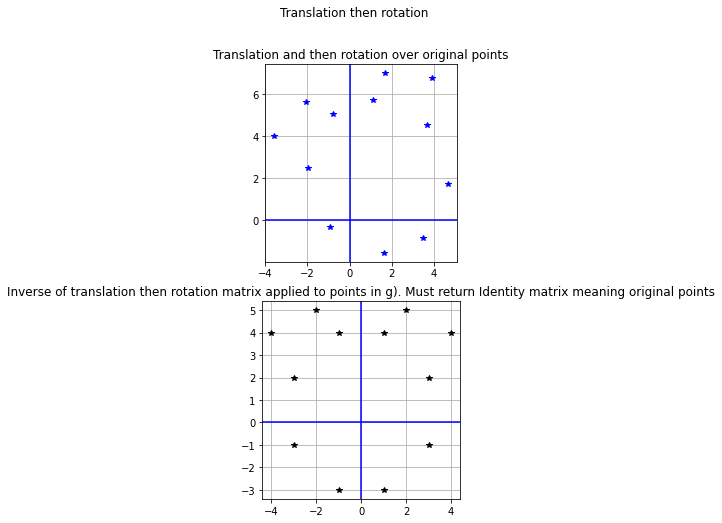

In [ ]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)

tetadeg = 20

#convert to radians
teta = np.pi*tetadeg / 180
tx=2
ty=1

# define your points as homogeneuos coordinates (3 coordinates).
points = np.array([[2,5,1],[4,4,1],[3,2,1],[3,-1,1],[1,-3,1],[-1,-3,1],[-3,-1,1],[-3,2,1],[-4,4,1],[-2,5,1],[-1,4,1],[1,4,1]])

# Make the points be in columns (you need to transpose them)
points = np.transpose(points)

# define your rotation matrix here:
R = np.array([[np.cos(teta), -1*np.sin(teta), 0],[np.sin(teta), np.cos(teta), 0], [0, 0, 1]])
print(f"a) R Matrix that represents a rotation of 20 degrees:\n {R} \n")

# define your translation matrix here:
T = np.array([[1, 0, tx],[0, 1, ty],[0, 0, 1]])
print(f"b) T Matrix that represents a translation of 2 in X direction, 1 in y direction:\n {T} \n")

# set up your plot
fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

# Plot original points to see everything looks correct
ax.plot(points[0,:], points[1,:],'r*')

# do the rotation
rotPoints = np.matmul(R, points)
plt.plot(rotPoints[0,:], rotPoints[1,:],'bo')
print("c) Original points in cartesian plane and d) Rotation of 20 degrees on the points")
plt.title('Original and rotated')
plt.show()

print()

# translation + rotation
fig, ax = plt.subplots(2)
fig.set_size_inches(8,8)
fig.suptitle('Rotation then translation')
#subplot 1
ax[0].clear()
ax[0].grid(True)
ax[0].axhline(0, color='blue')
ax[0].axvline(0, color='blue')
ax[0].set_aspect('equal')

#subplot 2
ax[1].clear()
ax[1].grid(True)
ax[1].axhline(0, color='blue')
ax[1].axvline(0, color='blue')
ax[1].set_aspect('equal')

# Compute translation over your rotated points
tRotPoints = np.matmul(T, rotPoints)
ax[0].plot(tRotPoints[0,:], tRotPoints[1,:],'g*')
ax[0].title.set_text("e) Translation over the points previously rotated")


# compute your rotation and translation matrix
tR = np.matmul(T, R)
# Transform your points
tRotPoints3 = np.matmul(tR, points)

# plot points
ax[1].plot(tRotPoints3[0,:],tRotPoints3[1,:],'m+')
ax[1].title.set_text("f) Rotation followed by a translation over original points")
plt.show()

print(f"Points obtained in e): \n {tRotPoints} \n")
print(f"Points obtained in f): \n {tRotPoints3} \n")

print(f"TR (rotate, then translate):\n {np.matmul(T, R)}\n")
print(f"RT (translate, then rotate):\n {np.matmul(R, T)}\n")

# compute your translation and rotation matrix
rT = np.matmul(R, T)
rTransPoints = np.matmul(rT, points)
print(f"Points obtained in g): \n {rTransPoints} \n")

# rotation + translation 
fig, ax = plt.subplots(2)
fig.set_size_inches(8,8)
fig.suptitle('Translation then rotation')
#subplot 1
ax[0].clear()
ax[0].grid(True)
ax[0].axhline(0, color='blue')
ax[0].axvline(0, color='blue')
ax[0].set_aspect('equal')

#subplot 2
ax[1].clear()
ax[1].grid(True)
ax[1].axhline(0, color='blue')
ax[1].axvline(0, color='blue')
ax[1].set_aspect('equal')

ax[0].plot(rTransPoints[0,:], rTransPoints[1,:],'b*')
ax[0].title.set_text("Translation and then rotation over original points")

inverseMatrix = np.linalg.inv(rT)
originalPoints = np.matmul(inverseMatrix, rTransPoints)

# plot points
ax[1].plot(originalPoints[0,:],originalPoints[1,:],'k*')
ax[1].title.set_text("Inverse of translation then rotation matrix applied to points in g). Must return Identity matrix meaning original points")
plt.show()


Answers

f) 

The points obtained in e) translation of 2 in `x` and 1 in `y` over previously rotated points are the SAME as the points obtained in f) where a transform of rotation of 20 degrees followed by a translation was applied to the original points

h) 

The matrices obtained in g) and f) are NOT the same because the order in which two matrices are multiplied matters. That is, rotation and translation are not commutative.

i) The new points match the original points as shown in the plots above

2. In this point you will be doing forward warping of an image and will be implementing a nearest neighbor interpolation on the following image. (Available [here](http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/) )<br>
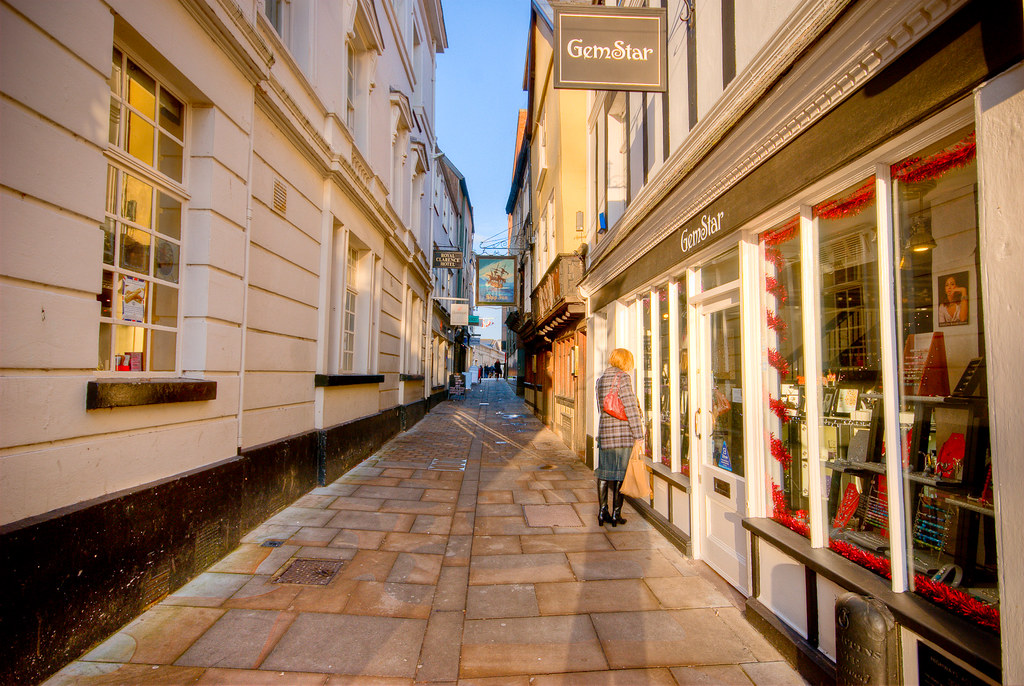
a) [10%] Implement forward warping of the grid points for the homography matrix: <br>
H=[[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],<br>
  [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],<br>
 [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]<br>
 <br> 
 b) [2%]Visualize the obtained warped image in the range from 0 to 1000 in x and y.<br>
 c) [2%]comment about the appereance of the image. Does the image have gaps?<br>
 d) [5%] How the warping looks in regions where outside the [0-1000 pixels in x,y]<br>
 e) [10%] Implement a forward  nearest neighbor interpolation in the warped image<br>
 f) [3%]Visualize the interpolated image. <br>
 g) [2%] comment about the appereance of the interpolated image versus the initially warped image.



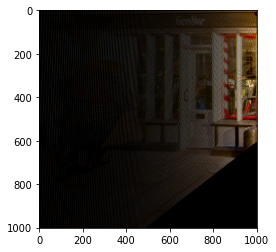

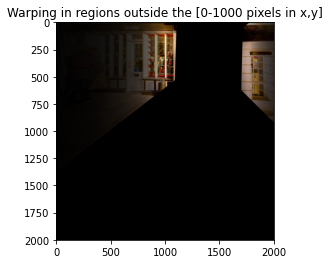

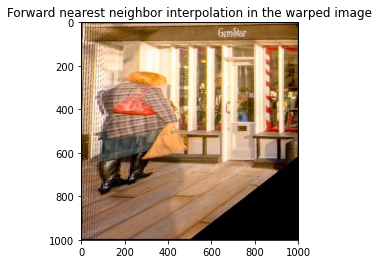

In [ ]:
import cv2
from skimage import io
from google.colab.patches import cv2_imshow

# load an image to warp
url = "http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/img2warp.jpg"
img = io.imread(url)
# cv2_imshow(img)

# print(img.shape)
# width:   686
# height:  1024
# channel: 3

# the values that can take y
i = np.linspace(0, img.shape[0]-1, img.shape[0]).astype(int)
# the values that can take x
j = np.linspace(0, img.shape[1]-1, img.shape[1]).astype(int)
# combination of values that can take x, and y in a grid
yv, xv = np.meshgrid(i, j)

# print("i\n", i)
# print()
# print("j\n", j)
# print()
# print("yv\n", yv)
# print()
# print("xv\n", xv)
# print()

# number of points on the grid 686*1024
numpoints = xv.ravel().shape[0]
# print(numpoints)

# extract the color channels
r = img[yv.ravel(),xv.ravel(),0]
g = img[yv.ravel(),xv.ravel(),1]
b = img[yv.ravel(),xv.ravel(),2]
# print("Red\n", r)
# print("Green\n", g)
# print("Black\n", b)

# Define Homography matrix 
H = np.array([[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],
              [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],
              [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]
)

# all the values of x coordinates as a row
x_cord = xv.ravel().reshape((1,numpoints))
# all the values of y coordinates as a row
y_cord = yv.ravel().reshape((1,numpoints))
# print("x_cord\n", x_cord)
# print()
# print("y_cord\n", y_cord)
# print()

# define the homogeneous coordinates
# [x values]
# [y values]
# [ones    ]
grid = np.concatenate((x_cord, y_cord, np.ones((1,numpoints))),axis=0)

# transform the grid (your canvas) in the new coordinated determined by the homography defined below
newgrid = np.matmul(H, grid)
# print("newgrid\n", newgrid)

# Convert from homogeneous to heterogeneous coordinates
newgridHetero = newgrid[:2,:]   # the x, and y

thethirdcoordinate = newgrid[2,:]
# print("The third coordinate\n", thethirdcoordinate)
# TO DO : complete the conversion. remember x=X/w
newgridHetero[0,:] = newgridHetero[0,:] / thethirdcoordinate
newgridHetero[1,:] = newgridHetero[1,:] / thethirdcoordinate

# define your new empty canvas (it will have -1 if is not defined)
warped = -np.ones((1001,1001,3)).astype(np.int16)

# Raw approximation. Considering just the integer values 
newgrid2= newgridHetero.round().astype(np.int64)

# only consider points that are in your area of interest (0 to 1000)
validsX = np.bitwise_and(newgrid2[0,:]>=0, newgrid2[0,:]<1000)
validsY = np.bitwise_and(newgrid2[1,:]>=0, newgrid2[1,:]<1000)
valids = np.bitwise_and(validsX, validsY)
# print("Valids: \n", valids)
# valids is a True/False 1D array

# assign color to the pixels that are valids
warped[newgrid2[1,valids],newgrid2[0,valids],0] = r[valids]
warped[newgrid2[1,valids],newgrid2[0,valids],1] = g[valids]
warped[newgrid2[1,valids],newgrid2[0,valids],2] = b[valids]

plt.imshow(warped)
plt.show()

warped_out = -np.ones((2001,2001,3)).astype(np.int16)

validsX_out = np.bitwise_and(newgrid2[0,:]>=0, newgrid2[0,:]<2000)
validsY_out = np.bitwise_and(newgrid2[1,:]>=0, newgrid2[1,:]<2000)
valids_out = np.bitwise_and(validsX_out, validsY_out)

warped_out[newgrid2[1,valids_out],newgrid2[0,valids_out],0] = r[valids_out]
warped_out[newgrid2[1,valids_out],newgrid2[0,valids_out],1] = g[valids_out]
warped_out[newgrid2[1,valids_out],newgrid2[0,valids_out],2] = b[valids_out]

plt.imshow(warped_out)
plt.title("Warping in regions outside the [0-1000 pixels in x,y]")
plt.show()

# nearest Neighbor interpolation
# your new canvas
warped2 = np.zeros((1001,1001,3)).astype(np.uint8)
# Area where we look for closest valid assignation
area2check=5

# loop over the valid area of the warped image
for i in range(area2check,warped.shape[0]-area2check):
    for j in range(area2check,warped.shape[1]-area2check):
        # check if the pixel has a valid warped value        
        if warped[i,j,0]==-1:  #need to look for neighbor
            distance = area2check*area2check+1  # assign a distance larger than any that can be found in the area to check
            
            # loop over all the possible neighbors
            for k in range(i-area2check,i+area2check):
                for l in range(j-area2check,j+area2check):
                    distancetested = (abs(k-i)+abs(l-j))  # L1 distance
                    if warped[k,l,0]>=0 and distancetested<distance:    # found a warped point , and it is closest
                        distance=distancetested
                        warped2[i,j]=warped[k,l]
        else:  #assign the valid warping
            warped2[i,j] =warped[i,j]
            
        
plt.imshow(warped2)
plt.title("Forward nearest neighbor interpolation in the warped image")
plt.show()


c) Comment about the appereance of the image. Does the image have gaps?

The image has a gap in the bottom right corner because the original image does not have information (pixels) when changing the perspective of the image from facing the store the person is looking at 

g) Comment about the appereance of the interpolated image versus the initially warped image.

In forward mapping, each pixel of the original image is sent to its corresponding location in the second image, but when a pixel lands "between" two pixels as in the first image above, a method such as nearest neighbor interpolation is necessary to correct the original pixel intensities from the original imagen. As such, the second image above (the interpolated image) looks better than the initially warped image after distributing a pixel color among neighboring pixels



3. Write a function of the form (10%):

 

>> imwarped = warpImage(im,H,limit_coordinates)

 

where im is the input image to be warped, H is the homography, and limit_coordinates defines the limits (xmin,xmax,ymin,ymax) of the warped image.  


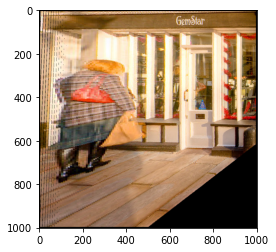

In [ ]:
from skimage import io

def warpImage(im, H, limit_coordinates):

  i = np.linspace(0, img.shape[0]-1, img.shape[0]).astype(int)
  j = np.linspace(0, img.shape[1]-1, img.shape[1]).astype(int)
  yv, xv = np.meshgrid(i, j)

  numpoints = xv.ravel().shape[0]

  # extract the color channels
  r = img[yv.ravel(),xv.ravel(),0]
  g = img[yv.ravel(),xv.ravel(),1]
  b = img[yv.ravel(),xv.ravel(),2]

  # all the values of x coordinates as a row
  x_cord = xv.ravel().reshape((1,numpoints))
  # all the values of y coordinates as a row
  y_cord = yv.ravel().reshape((1,numpoints))

  # define the homogeneous coordinates
  grid = np.concatenate((x_cord, y_cord, np.ones((1,numpoints))),axis=0)

  # transform the grid (your canvas) in the new coordinated determined by the homography defined below
  newgrid = np.matmul(H, grid)

  # Convert from homogeneous to heterogeneous coordinates
  newgridHetero = newgrid[:2,:]   # the x, and y
  thethirdcoordinate = newgrid[2,:]

  newgridHetero[0,:]= newgridHetero[0,:] / thethirdcoordinate
  newgridHetero[1,:]= newgridHetero[1,:] / thethirdcoordinate

  # define your new empty canvas (it will have -1 if is not defined)
  # limit_coordinates defines the limits (xmin,xmax,ymin,ymax)
  x_span = np.abs(limit_coordinates[1]-limit_coordinates[0]) + 1
  y_span = np.abs(limit_coordinates[3]-limit_coordinates[2]) + 1

  warped = -np.ones((y_span,x_span,3)).astype(np.int16)

  # Raw approximation. Considering just the integer values 
  newgrid2 = newgridHetero.round().astype(np.int64)

  # only consider points that are in your area of interest (0 to 1000)
  validsX=np.bitwise_and(newgrid2[0,:]>=limit_coordinates[0],newgrid2[0,:]<limit_coordinates[1])
  validsY=np.bitwise_and(newgrid2[1,:]>=limit_coordinates[2],newgrid2[1,:]<limit_coordinates[3])
  valids = np.bitwise_and(validsX,validsY)

  # assign color to the pixels that are valids
  warped[newgrid2[1,valids],newgrid2[0,valids],0] = r[valids]
  warped[newgrid2[1,valids],newgrid2[0,valids],1] = g[valids]
  warped[newgrid2[1,valids],newgrid2[0,valids],2] = b[valids]

  # nearest Neighbor interpolation
  # new canvas
  warped2 = np.zeros((y_span,x_span,3)).astype(np.uint8)
  # Area where we look for closest valid assignation
  area2check=5

  # loop over the valid area of the warped image
  for i in range(area2check,warped.shape[0]-area2check):
      for j in range(area2check,warped.shape[1]-area2check):
          # check if the pixel has a valid warped value        
          if warped[i,j,0]==-1:  #need to look for neighbor
              distance = area2check*area2check+1  # assign a distance larger than any that can be found in the area to check
              
              # loop over all the possible neighbors
              for k in range(i-area2check,i+area2check):
                  for l in range(j-area2check,j+area2check):
                      distancetested = (abs(k-i)+abs(l-j))  # L1 distance
                      if warped[k,l,0]>=0 and distancetested<distance:    # found a warped point , and it is closest
                          distance=distancetested
                          warped2[i,j]=warped[k,l]
          else:  #assign the valid warping
              warped2[i,j] = warped[i,j]

  return warped2


# Testing the function with same image
url = "http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/img2warp.jpg"
img = io.imread(url)
H = np.array([[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],
            [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],
            [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]])

limit_coord = [0, 1000, 0, 1000]
warped_test = warpImage(img, H, limit_coord)

plt.imshow(warped_test)
plt.show()

<br>

4. **Recover Homographies (10%)**.  Before you can warp your images into alignment, you need to recover the parameters of the transformation between each pair of images.  
In our case, the transformation is a homography: $p’=Hp$, 
where:
* $(p’,p)$ are pairs of corresponding points taken from the two images.  
* $H$ is a 3x3 matrix with 8 degrees of freedom (lower right corner is a scaling factor and can be set to 1;  $h_{2,2}  = 1$). <br>

Considering the matrix form below, <b>obtain an expression of the form $Ax=b$ if $h_{22} =1$ </b><br>

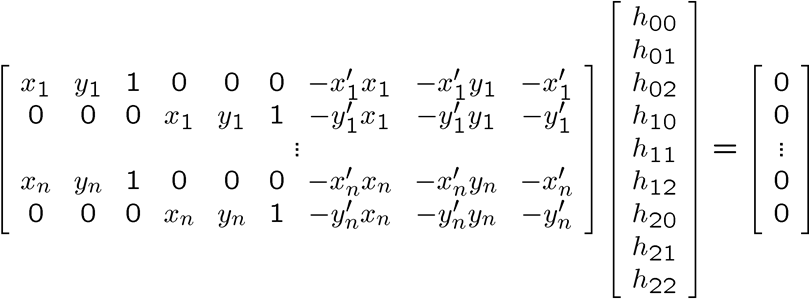
<br>
<b>Tip: if $h_{2,2}$ is 1, you can have 1 parameter less in the h vector and 1 column less in the matrix; b will not be zero anymore</b>
<br>
<br>

Answer

\begin{align}
        \begin{pmatrix}
        x_1 & y_1 & 1 & 0 & 0 & 0 & -x_1^{\prime}x_1 & -x_1^{\prime}y_1 \\
        0 & 0 & 0 & x_1 & y_1 & 1 & -y_1^{\prime}x_1 & -y_1^{\prime}y_1 \\
        .\\
        .\\
        .\\
        x_n & y_n & 1 & 0 & 0 & 0 & -x_n^{\prime}x_n & -x_n^{\prime}y_n \\
        0 & 0 & 0 & x_n & y_n & 1 & -y_n^{\prime}x_n & -y_n^{\prime}y_n \\
        \end{pmatrix}
        \begin{pmatrix}
        h_{00}\\
        h_{01}\\
        h_{02}\\
        h_{10}\\
        h_{11}\\
        h_{12}\\
        h_{20}\\
        h_{21}\\       
        \end{pmatrix} = 
        \begin{pmatrix}
        x_1^{\prime}\\
        y_1^{\prime}\\
        .\\
        .\\
        .\\
        x_n^{\prime}\\
        y_n^{\prime}\\
        \end{pmatrix}
    \end{align}

5. Write a python function using the expression obtained in the previous point with the following prototype (10%): <br>

>> H = computeH(im1_pts,im2_pts) <br>

> where im1_pts and im2_pts are n-by-2 matrices holding the (x,y) locations of n point correspondences from the two images and H is the recovered 3x3 homography matrix.  <br>
<br>

6. Test your functions. Select 4 points manually from the image in point 2. The cooresponding points will be your corner points in the new warped image (origin, top right, bottom right, bottom left). <br>
a) Compute a new homography matrix using function created in 5. (10%).<br>
b) Visualize the warped image using the function created in 3. (8%).<br>
<br>

**BONUS [50%] Stackable with other homeworks if your score overpass 100%**: 
Write a function of the form:

 
>> imwarped = warpImage(im,H)

 

where im is the input image to be warped and H is the homography.  

Use inverse warping (but remember that for inverse warping you will need to compute H in the right “direction”). 

Try to write the whole function without any loops. One thing you need to pay attention to is the size of the resulting image (you can predict the bounding box by piping the four corners of the image through H, or use extra input parameters).  Also pay attention to how you mark pixels which don’t have any values.

Utilizes bilinear interpolation to approximate non integer pixel positions.



In [ ]:
def computeH(im1_pts, im2_pts):
  # matrices must have shame shape
  if(im1_pts.shape != im2_pts.shape):
    return

  numPoints = im1_pts.shape[0]
  # print(f"Number of Points: {numPoints}\n")
  
  A = np.zeros((2*numPoints, 8))
  b = np.zeros((2*numPoints, 1))

  # fill matrix A and column vector b
  for i in range(numPoints):
    A[2*i,:] = [im1_pts[i,0], im1_pts[i,1], 1, 0, 0, 0, -im2_pts[i,0]*im1_pts[i,0], -im2_pts[i,0]*im1_pts[i,1]]
    A[2*i+1,:] = [0, 0, 0, im1_pts[i, 0], im1_pts[i, 1], 1, -im2_pts[i,1]*im1_pts[i,0], -im2_pts[i,1]*im1_pts[i,1]]

    b[2*i,:] = im2_pts[i,0]
    b[2*i+1,:] = im2_pts[i,1]
  
  # print(A)
  # print()
  # print(b)
  # print()

  # least squares solution to Ax=b
  x,residuals,rank,s = np.linalg.lstsq(A, b, rcond=None)

  # the expression was obtained when h22=1. Append this value to the x solution
  x = np.append(x, [[1]], axis=0)
  # print(f"x matrix:\n{x}")
  # print(x.shape)

  H = np.reshape(x, (3,3))
  print(f"Homography (H) matrix:\n{H}\n")

  return H


Homography (H) matrix:
[[ 1.29629630e+00 -2.62485346e-15 -8.22945499e-13]
 [-1.29629630e+00  1.11111111e+00  2.22222222e+02]
 [-2.03703704e-03 -2.16840434e-18  1.00000000e+00]]



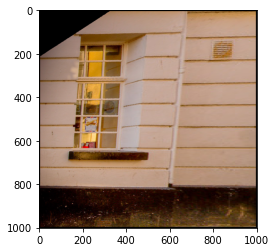

In [ ]:
# selected points

# im1_pts = np.array([[0,-200],[0,700],[300,150],[300,500]])
im1_pts = np.array([[0,-200],[0,700],[300,150],[300,500]])
im2_pts = np.array([[0,0],[0,1000],[1000,0],[1000,1000]])

H = computeH(im1_pts,im2_pts)

# Testing the function with same image
url = "http://www.cs.ucf.edu/~gvaca/teaching/CAP4453-Fall2021/homeworks/hw5/img2warp.jpg"
img = io.imread(url)
limit_coord = [0, 1000, 0, 1000]

plt.imshow(img)

warped_test = warpImage(img, H, limit_coord)

plt.imshow(warped_test)
plt.show()